In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from hdf5storage import loadmat
import h5py

In [5]:
# data_folder = 'data'


# data = loadmat(f'{data_folder}/CC182-0906/CC182_240906_Combined_dFFdotMeanValues.mat')['dFFdotMeanValues']

# 4 x 36 cell (4 sessions of 10 repeats x 36 stimulus conditions)

# within each cell, we find a matrix:

# 10 repeats x 73 neurons

# where each value is the mean dF/F for each trial (presentation).



# Traces files:
# 4 x 36 cell (4 sessions of 10 repeats x 36 stimulus conditions)

# within each cell, we find a tensor:
# # frames x # neurons x # repeats (including 1 sec before and after stimulus)

In [ ]:
# # DECODING ANALYSIS

# # create a matrix: trial FRs x neurons
# N_SESSIONS, N_STIMS = data.shape
# N_REPS = 10
# # total trials: 36 stimuli x 10 reps x 4 sessions = 1440

# X = np.array([data[session_i,stim_i] for stim_i in range(N_STIMS) for session_i in range(N_SESSIONS)]).reshape(
#     (N_SESSIONS*N_STIMS*N_REPS, -1))

# stimulus_labels = np.repeat(np.arange(N_STIMS), N_SESSIONS * N_REPS)
# session_labels = np.tile(np.repeat(np.arange(N_SESSIONS), N_REPS), (1, N_STIMS))

In [5]:
## NEW CODE (using h5py)

mat_file_path = f'data/CC182-0906/CC182_240906_Combined_dFFdotMeanValues.mat'

with h5py.File(mat_file_path, 'r') as f:
    # Access the 'dFFdotMeanValues' dataset (which has shape 36x4)
    data = f['dFFdotMeanValues']
    
    # Check the shape of the dataset, should be (36, 4)
    N_STIMS, N_SESSIONS  = data.shape
    N_NEURONS, N_REPS = f[data[0, 0]].shape
    

    X = np.reshape([np.asarray(f[data[stim_i, session_i]]).T for stim_i in range(N_STIMS) for session_i in range(N_SESSIONS)],
                   (N_SESSIONS*N_STIMS*N_REPS, -1))
    
stimulus_labels = np.repeat(np.arange(N_STIMS), N_SESSIONS * N_REPS)
session_labels = np.tile(np.repeat(np.arange(N_SESSIONS), N_REPS), (1, N_STIMS)).ravel()

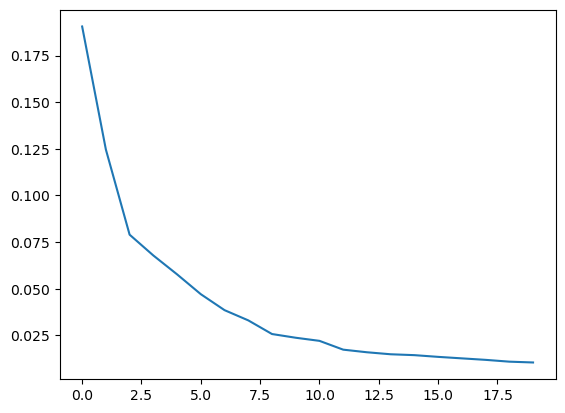

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(20)
Y = pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_)

Ix Frame 	 Stimulus
 0 000121 	 -1dotD2_dir270
 1 000331 	 +-1dot_opp_dir270,90
 2 000541 	 +1dotD2_dir180
 3 000751 	 -3dotD2_dir180
 4 000961 	 +-1dot_dir270,270
 5 001171 	 --1dotD1opp_dir180,0
 6 001381 	 gratW2_dir90
 7 001591 	 ++1dotD1opp_dir0,180
 8 001801 	 +3dotD2_dir180
 9 002011 	 -1dotD2_dir0
10 002221 	 +1dotD2_dir270
11 002431 	 gratW2_dir270
12 002641 	 +-1dot_opp_dir0,180
13 002851 	 -3dotD2_dir90
14 003061 	 ++1dotD1opp_dir90,270
15 003271 	 +-1dot_dir180,180
16 003481 	 --1dotD1opp_dir270,90
17 003691 	 +3dotD2_dir270
18 003901 	 -3dotD2_dir0
19 004111 	 gratW2_dir0
20 004321 	 +-1dot_dir90,90
21 004531 	 +3dotD2_dir0
22 004741 	 -1dotD2_dir90
23 004951 	 +-1dot_opp_dir180,0
24 005161 	 --1dotD1opp_dir0,180
25 005371 	 +1dotD2_dir0
26 005581 	 ++1dotD1opp_dir180,0
27 005791 	 ++1dotD1opp_dir270,90
28 006001 	 +1dotD2_dir90
29 006211 	 +-1dot_opp_dir90,270
30 006421 	 +-1dot_dir0,0
31 006631 	 gratW2_dir180
32 006841 	 -1dotD2_dir180
33 007051 	 -3dotD2_dir270
34 007261 	 --1dotD1opp_dir90,270
35 007471 	 +3dotD2_dir90

In [27]:
gratings_ixs = [19, 6, 31, 11] #dir: 0, 90, 180, 270
neg_1flows_ixs = [9, 22, 32, 0]
pos_1flows_ixs = [25, 28, 2, 10]
neg_3flows_ixs = [18, 13, 3, 33]
pos_3flows_ixs = [21, 35, 8, 17]
pos_oppdir_ixs = [7, 26, 14, 27]
neg_oppdir_ixs = [24, 5, 34, 16]
posneg_samedir_ixs = [30, 20, 15, 4]
posnet_oppdir_ixs = [12, 29, 23, 1]


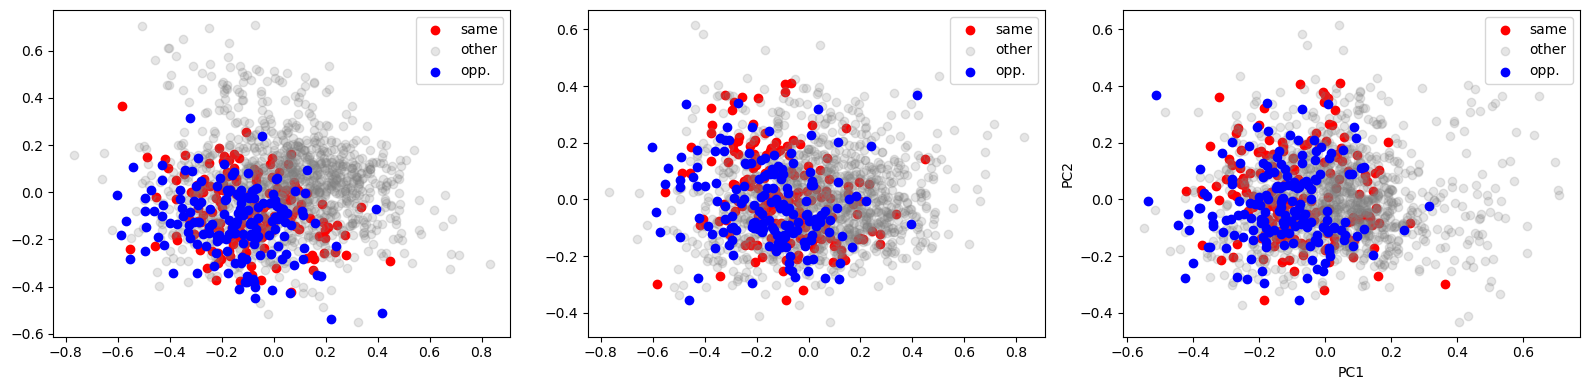

In [22]:
### +- SAME DIR vs. OPPOSITE DIR

PCs = [(0,1), (0,2), (1,2)]

labels_to_use = stimulus_labels
same_vs_opp_pol = np.zeros_like(stimulus_labels)

for i in posneg_samedir_ixs:
    same_vs_opp_pol[(stimulus_labels == i)] = -1
for i in posnet_oppdir_ixs:
    same_vs_opp_pol[(stimulus_labels == i)] = 1
c = same_vs_opp_pol


colors = ['red','gray','blue']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(-1, 1, 'same'), (0, .2, 'other'), (1, 1, 'opp.')]):
        ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name)
    ax.legend()
ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

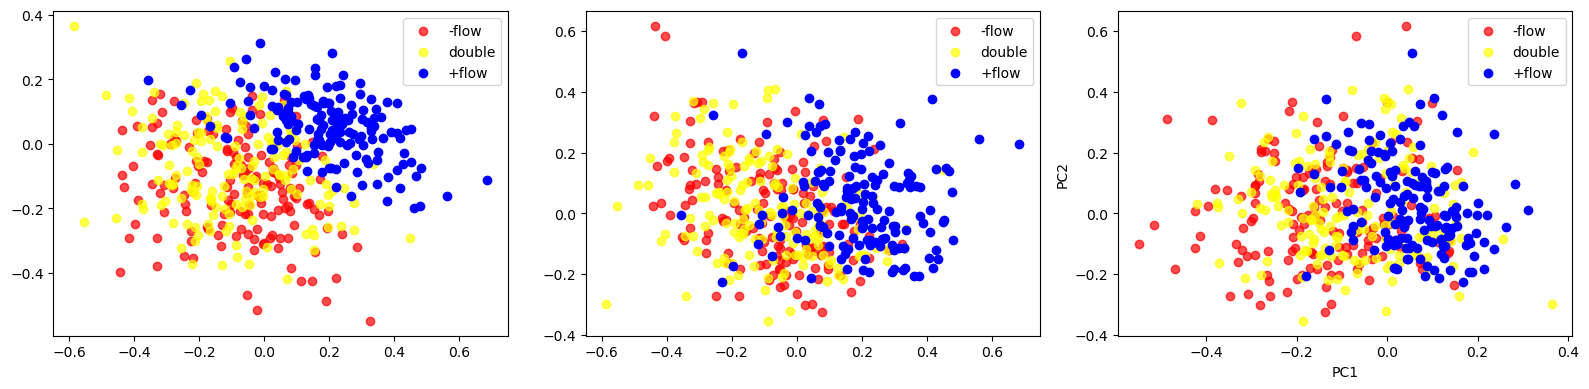

In [14]:
### +FLOW vs. +-FLOWS vs. -FLOWS

PCs = [(0,1), (0,2), (1,2)]

labels_to_use = stimulus_labels
double_vs_single_pol = np.zeros_like(stimulus_labels)

for i in neg_1flows_ixs:
    double_vs_single_pol[(stimulus_labels == i)] = 1
for i in posneg_samedir_ixs:
    double_vs_single_pol[(stimulus_labels == i)] = 2
for i in pos_1flows_ixs:
    double_vs_single_pol[(stimulus_labels == i)] = 3
c = double_vs_single_pol


colors = ['red','yellow','blue']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(1, .7, '-flow'), (2, .7, 'double'), (3, 1, '+flow')]):
        ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name)
    ax.legend()
ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

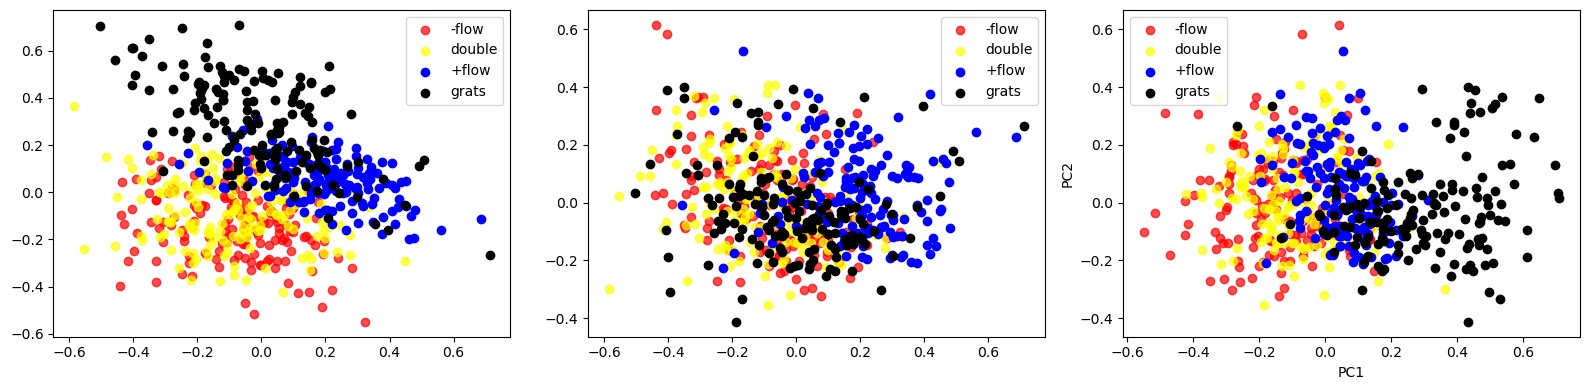

In [35]:
### +FLOW vs. +-FLOWS vs. -FLOWS

PCs = [(0,1), (0,2), (1,2)]

labels_to_use = stimulus_labels
double_vs_single_pol = np.zeros_like(stimulus_labels)

for i in neg_1flows_ixs:
    double_vs_single_pol[(stimulus_labels == i)] = 1
for i in posneg_samedir_ixs:
    double_vs_single_pol[(stimulus_labels == i)] = 2
for i in pos_1flows_ixs:
    double_vs_single_pol[(stimulus_labels == i)] = 3
for i in gratings_ixs:
    double_vs_single_pol[(stimulus_labels == i)] = 4
c = double_vs_single_pol


colors = ['red','yellow','blue','k']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(1, .7, '-flow'), (2, .7, 'double'), (3, 1, '+flow'), (4, 1, 'grats')]):
        ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name)
    ax.legend()
ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

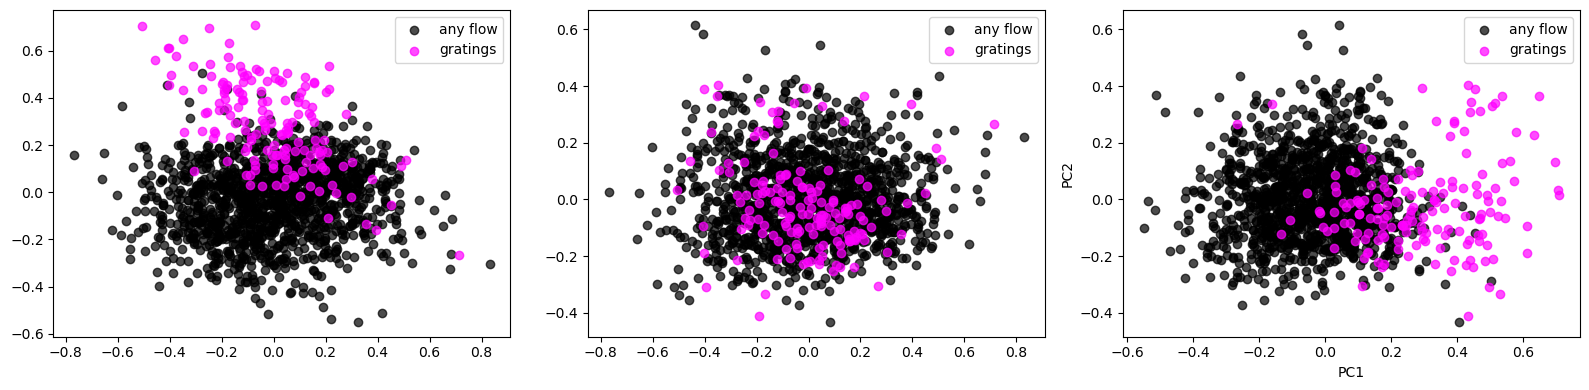

In [29]:
### GRATINGS vs. FLOWS

PCs = [(0,1), (0,2), (1,2)]

labels_to_use = stimulus_labels
gratings_vs_flows = np.zeros_like(stimulus_labels)

for i in gratings_ixs:
    gratings_vs_flows[(stimulus_labels == i)] = 1
c = gratings_vs_flows

colors = ['k','magenta']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(0, .7, 'any flow'), (1, .7, 'gratings')]):
        ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name)
    ax.legend()
ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
# for ax, pcs in zip(axes, PCs):
#     ax.scatter(*Y[:,pcs].T, c=gratings_vs_flows, cmap='viridis')
#     ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

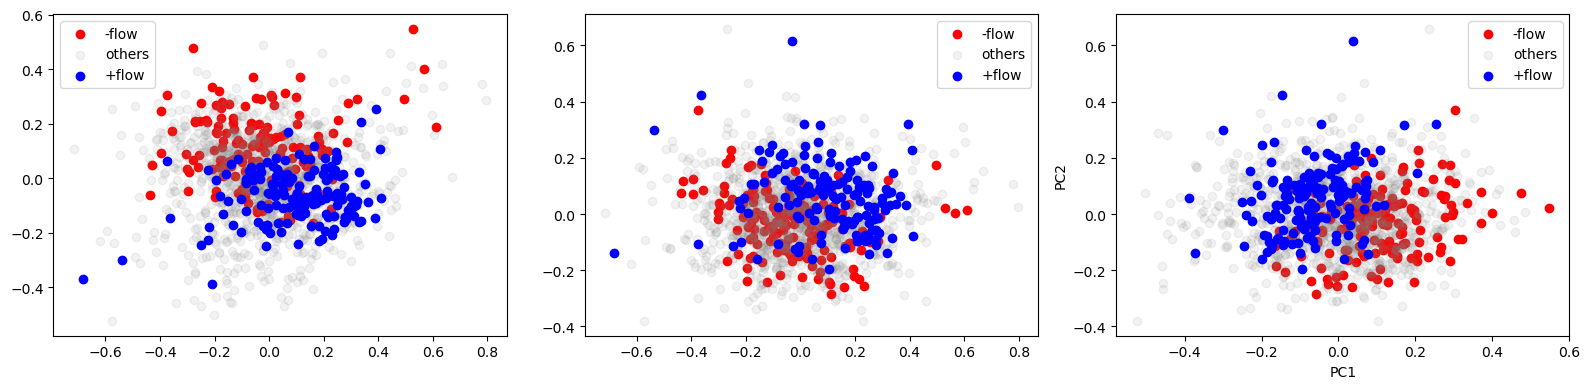

In [18]:
### +FLOW vs. -FLOWS

PCs = [(0,1), (0,2), (1,2)]

labels_to_use = stimulus_labels
pos_vs_neg_flows = np.zeros_like(stimulus_labels)

for i in neg_flows_ixs:
    pos_vs_neg_flows[(stimulus_labels == i)] = -1
for i in pos_flows_ixs:
    pos_vs_neg_flows[(stimulus_labels == i)] = 1

c = pos_vs_neg_flows
colors = ['red','gray','blue']
f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

for ax, pcs in zip(axes, PCs):
    for i, (lbl, alpha, lbl_name) in enumerate([(-1, 1, '-flow'), (0, .1, 'others'), (1, 1, '+flow')]):
        ax.scatter(*Y[c==lbl][:,pcs].T, c=colors[i], alpha=alpha, label=lbl_name)
    ax.legend()
ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

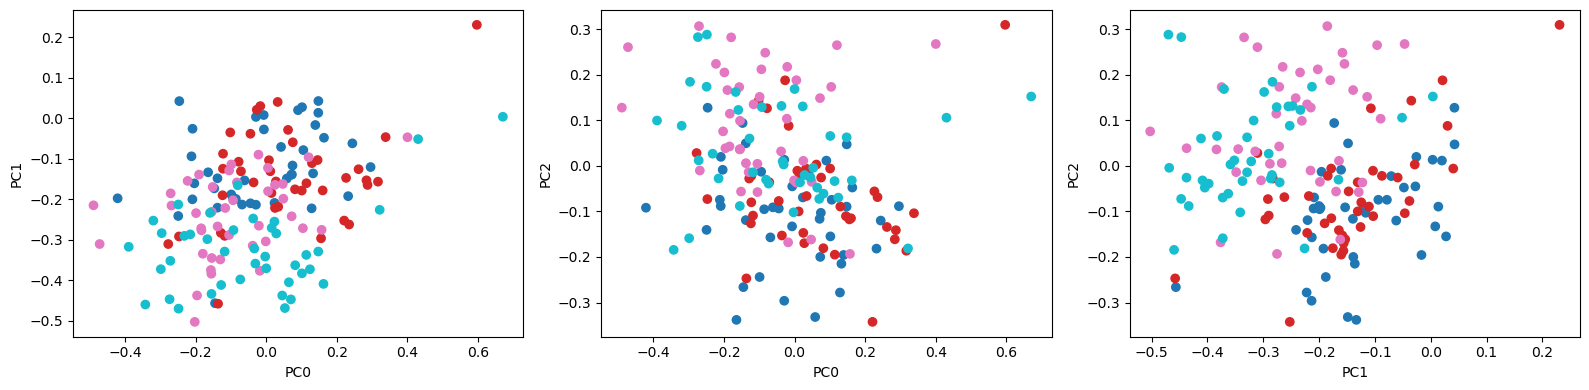

In [68]:
### GRATING DIRECTIONS

PCs = [(0,1), (0,2), (1,2)]

labels_to_use = stimulus_labels
gratings_vs_flows = np.zeros_like(stimulus_labels)
gratings_vs_flows[(stimulus_labels == 6) | (stimulus_labels == 11) | (stimulus_labels == 19) | (stimulus_labels == 31)] = 1

gratings_dirs = np.zeros_like(stimulus_labels)
gratings_dirs[(stimulus_labels == 6)] = 1
gratings_dirs[(stimulus_labels == 11)] = 2
gratings_dirs[(stimulus_labels == 19)] = 3
gratings_dirs[(stimulus_labels == 31)] = 4
gratings_dirs = gratings_dirs[gratings_vs_flows > 0]



f, axes = plt.subplots(1, len(PCs), figsize=(4*4, 4))

for ax, pcs in zip(axes, PCs):
    ax.scatter(*Y[gratings_vs_flows > 0][:,pcs].T, c=gratings_dirs, cmap='tab10')
    ax.set(xlabel=f'PC{pcs[0]}', ylabel=f'PC{pcs[1]}')
    
f.tight_layout()
plt.show()

### Encoding

In [23]:
data_folder = 'data'

# experiment = 'CC182_0906'
data = loadmat(f'{data_folder}/CC182-0906/CC182_240906_Combined_dFFdotTraces.mat')['dFFdotTraces']
data.shape # 4 x 36 cell (4 sessions x 36 stimulus conditions)

# each cell is (85, 73, 10) -- (number of time steps x # neurons x # repetitions)

# for each stimulus:
  # trials x time


(4, 36)

In [29]:
N_NEURONS = 73
N_STIMS = 36
N_SESSIONS = 4
N_REPS = 10
TRIAL_LEN = 85
X = np.zeros((N_STIMS, N_NEURONS, TRIAL_LEN))

traces_file_path = f'data/CC182-0906/CC182_240906_Combined_dFFdotTraces.mat'

with h5py.File(traces_file_path, 'r') as f:
    # Access the 'dFFdotMeanValues' dataset (which has shape 36x4)
    data = f['dFFdotTraces']

    for si in range(N_STIMS):
        X[si] = np.concatenate([f[data[si,session_i]] for session_i in range(N_SESSIONS)]).mean(0)

X = np.moveaxis(X, 1,0)
X.shape # (N_NEURONS, N_STIMS, TRIAL_LEN)

(73, 36, 85)

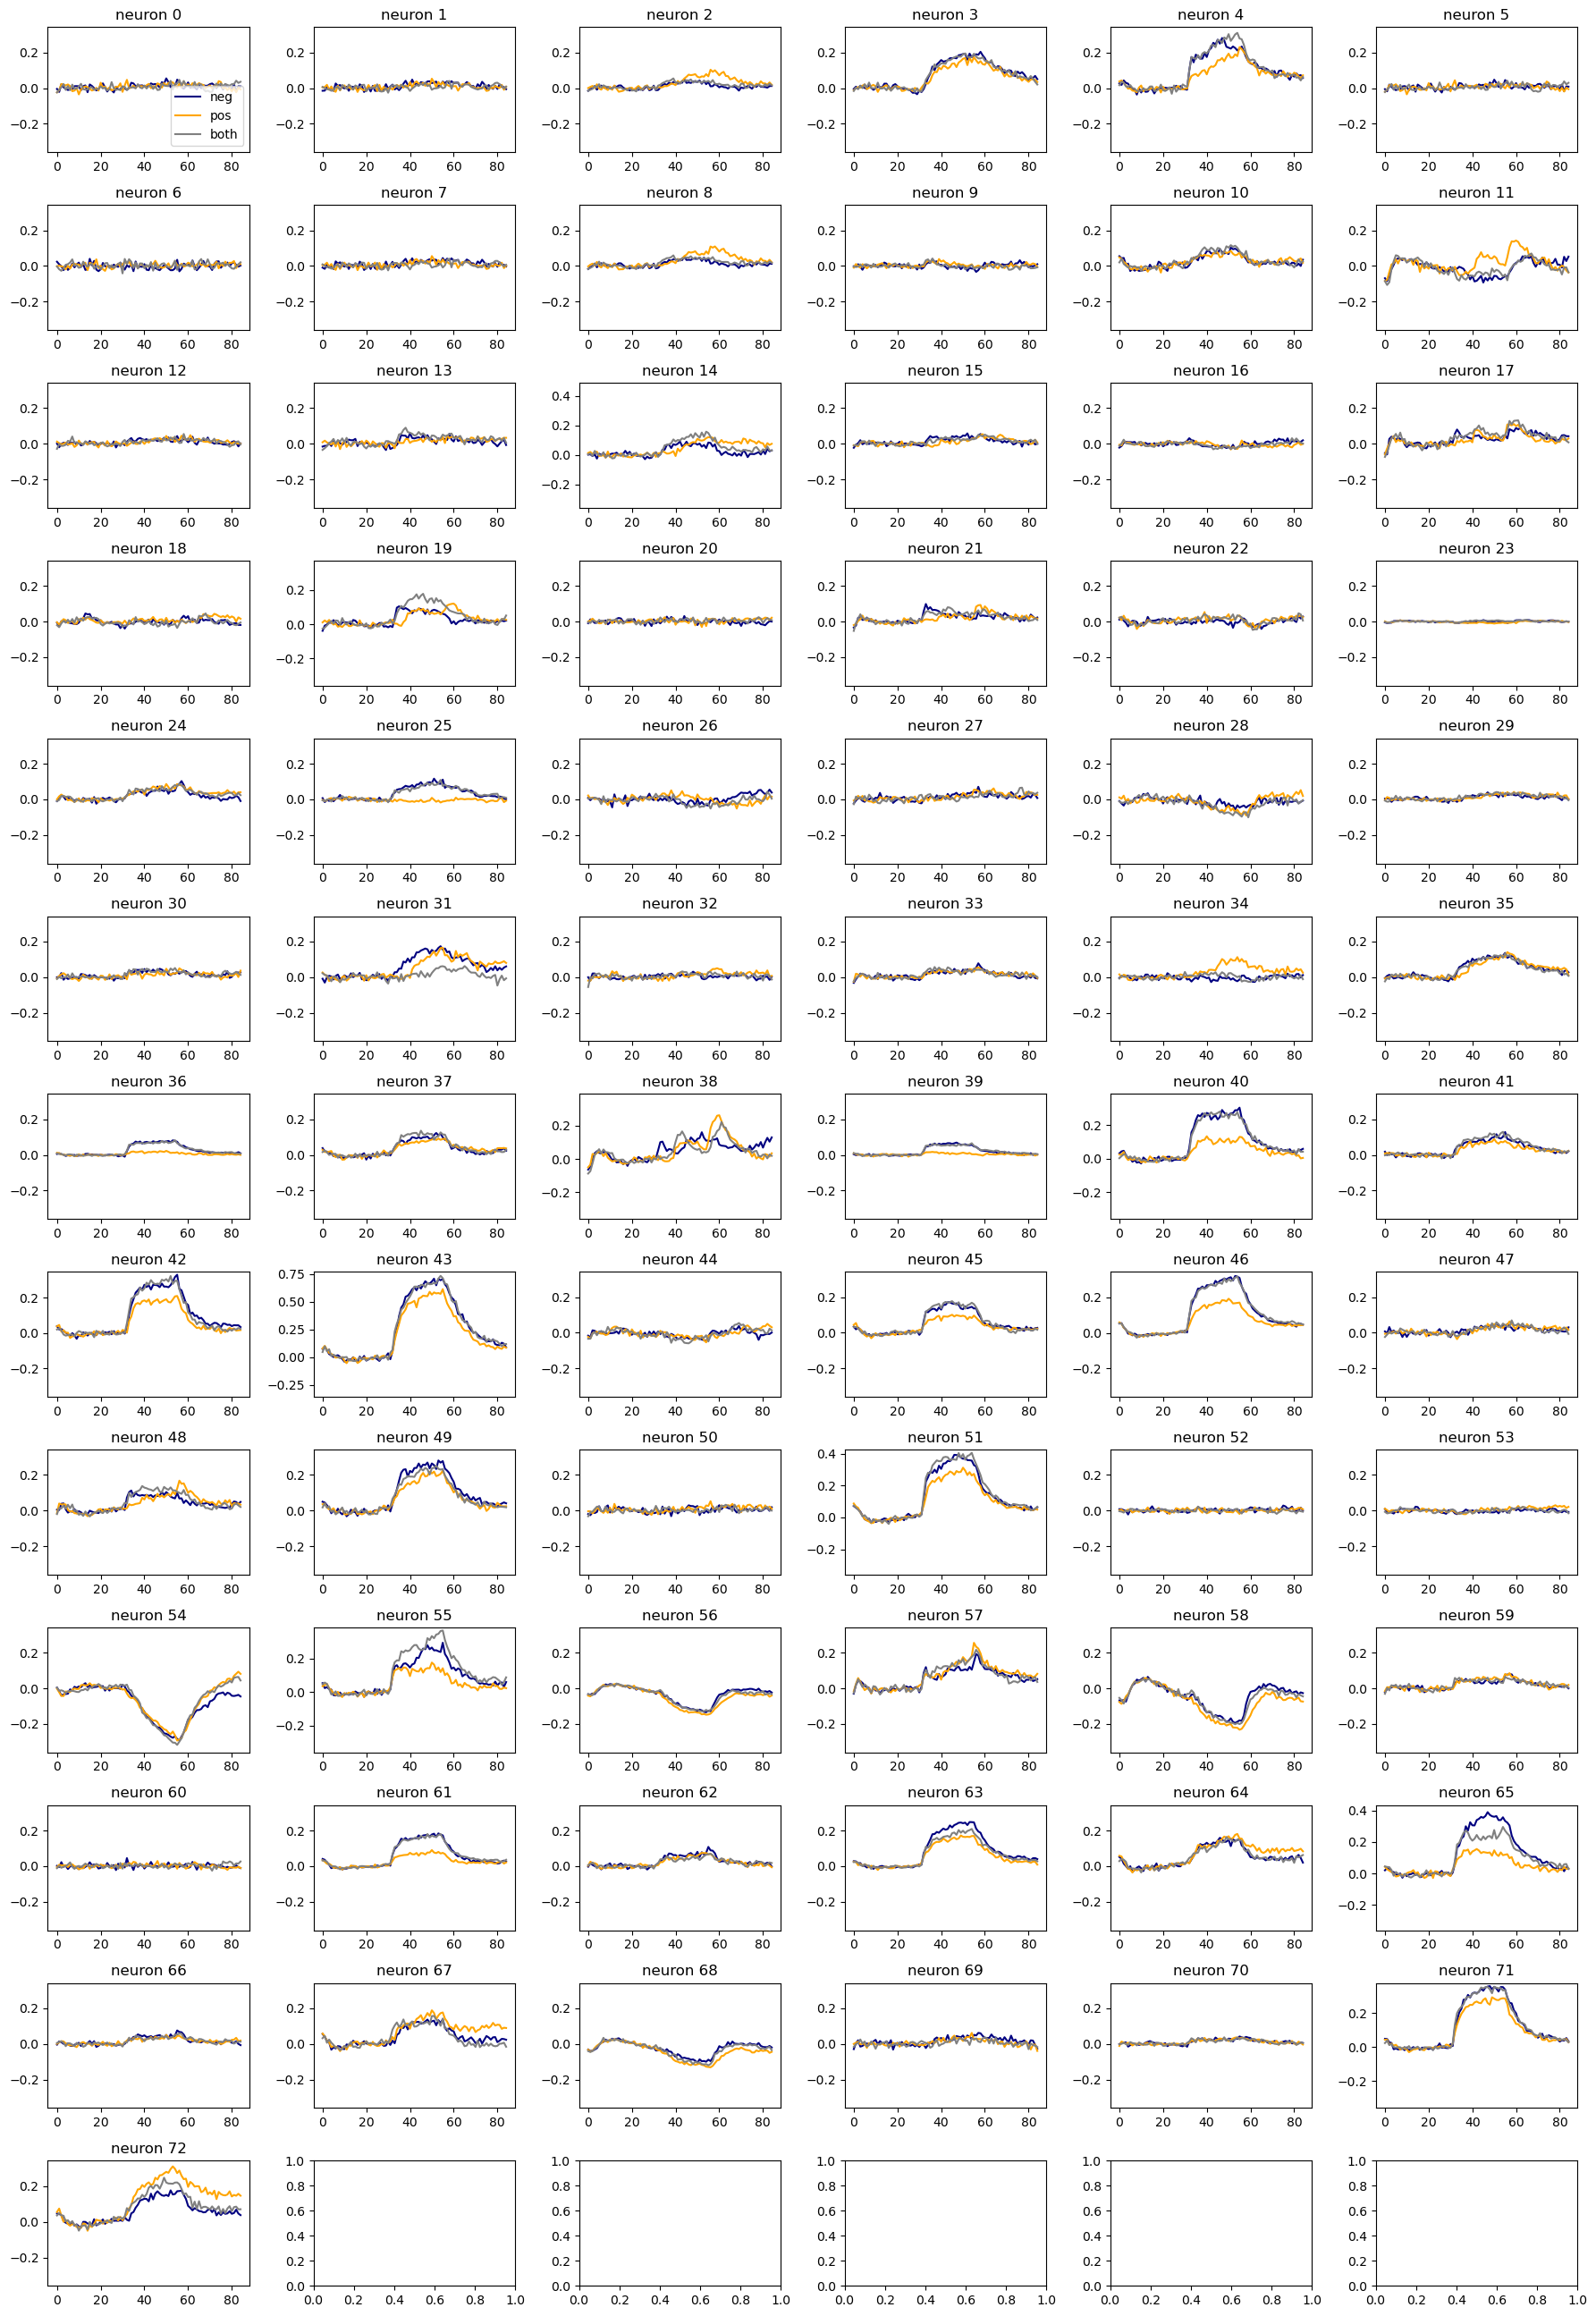

In [54]:
#pick a neuron
ni = 2



# pick some stimuli -- gratings all directions
stim_is = [neg_1flows_ixs, pos_1flows_ixs, posneg_samedir_ixs]
stim_lbls = ['neg', 'pos', 'both']
stim_colors = ['navy', 'orange', 'gray']

ncols = 6
nrows = int(np.ceil(N_NEURONS/ncols))

vmin = X.min()
vmax = abs(vmin)

f, axes = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*2))
for ni in range(N_NEURONS):
    ax = axes.ravel()[ni]
    for i, stim_ixs in enumerate(stim_is):
        best_ix = stim_ixs[X[ni,stim_ixs].mean(-1).argmax()]
        ax.plot(X[ni, best_ix], color=stim_colors[i], label=stim_lbls[i])
        
    ax.set(ylim=(vmin*1.05, max(vmax, X[ni].max()*1.05)), title=f'neuron {ni}')
    if ni == 0:
        ax.legend()
        
f.tight_layout()
plt.show()

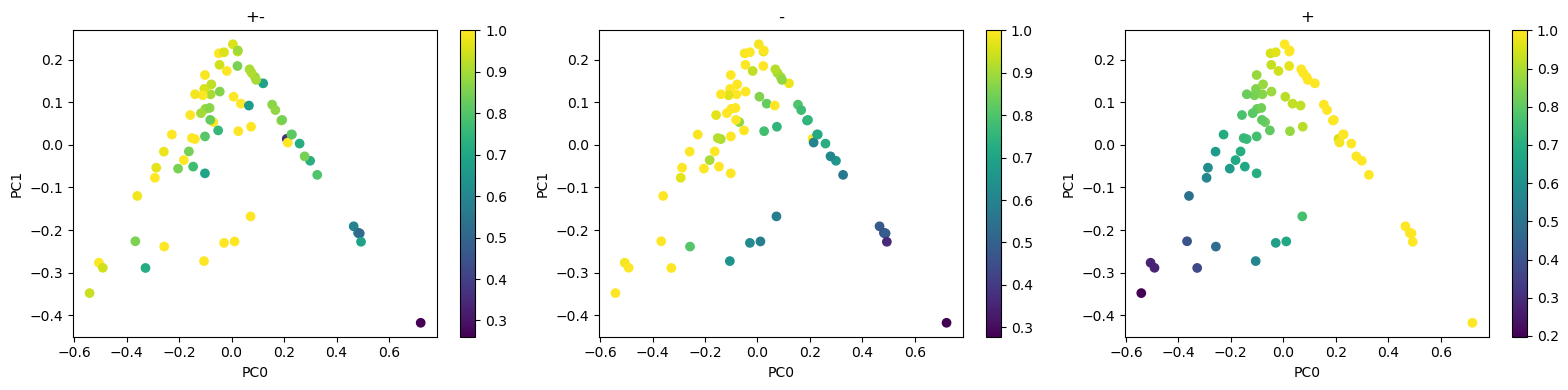

In [58]:
# for each neuron, compute its best FR for each of: posneg_samedir_ixs, neg_1flows_ixs, pos_1flows_ixs

my_stims = [('+-', posneg_samedir_ixs), ('-', neg_1flows_ixs), ('+', pos_1flows_ixs)]


best_FRs = np.zeros((N_NEURONS, len(my_stims)))

for si, (stimname, stim_ixs) in enumerate(my_stims):
    best_FRs[:,si] = X[:, stim_ixs, :].max(2).max(1) #pick the "best" mean FR (max across directions)

best_FRs /= best_FRs.max(1, keepdims=True)
    
from sklearn.decomposition import PCA
pca = PCA(2)
# compute PCA to plot neurons in 2-D
Y = pca.fit_transform(best_FRs)

f, axes = plt.subplots(1, len(my_stims), figsize=(4*4, 4))

for i, ax in enumerate(axes):
    sc = ax.scatter(*Y.T, c=best_FRs[:,i])
    f.colorbar(sc,ax=ax)
    ax.set(xlabel=f'PC0', ylabel=f'PC1', title=my_stims[i][0])
    
f.tight_layout()
plt.show()

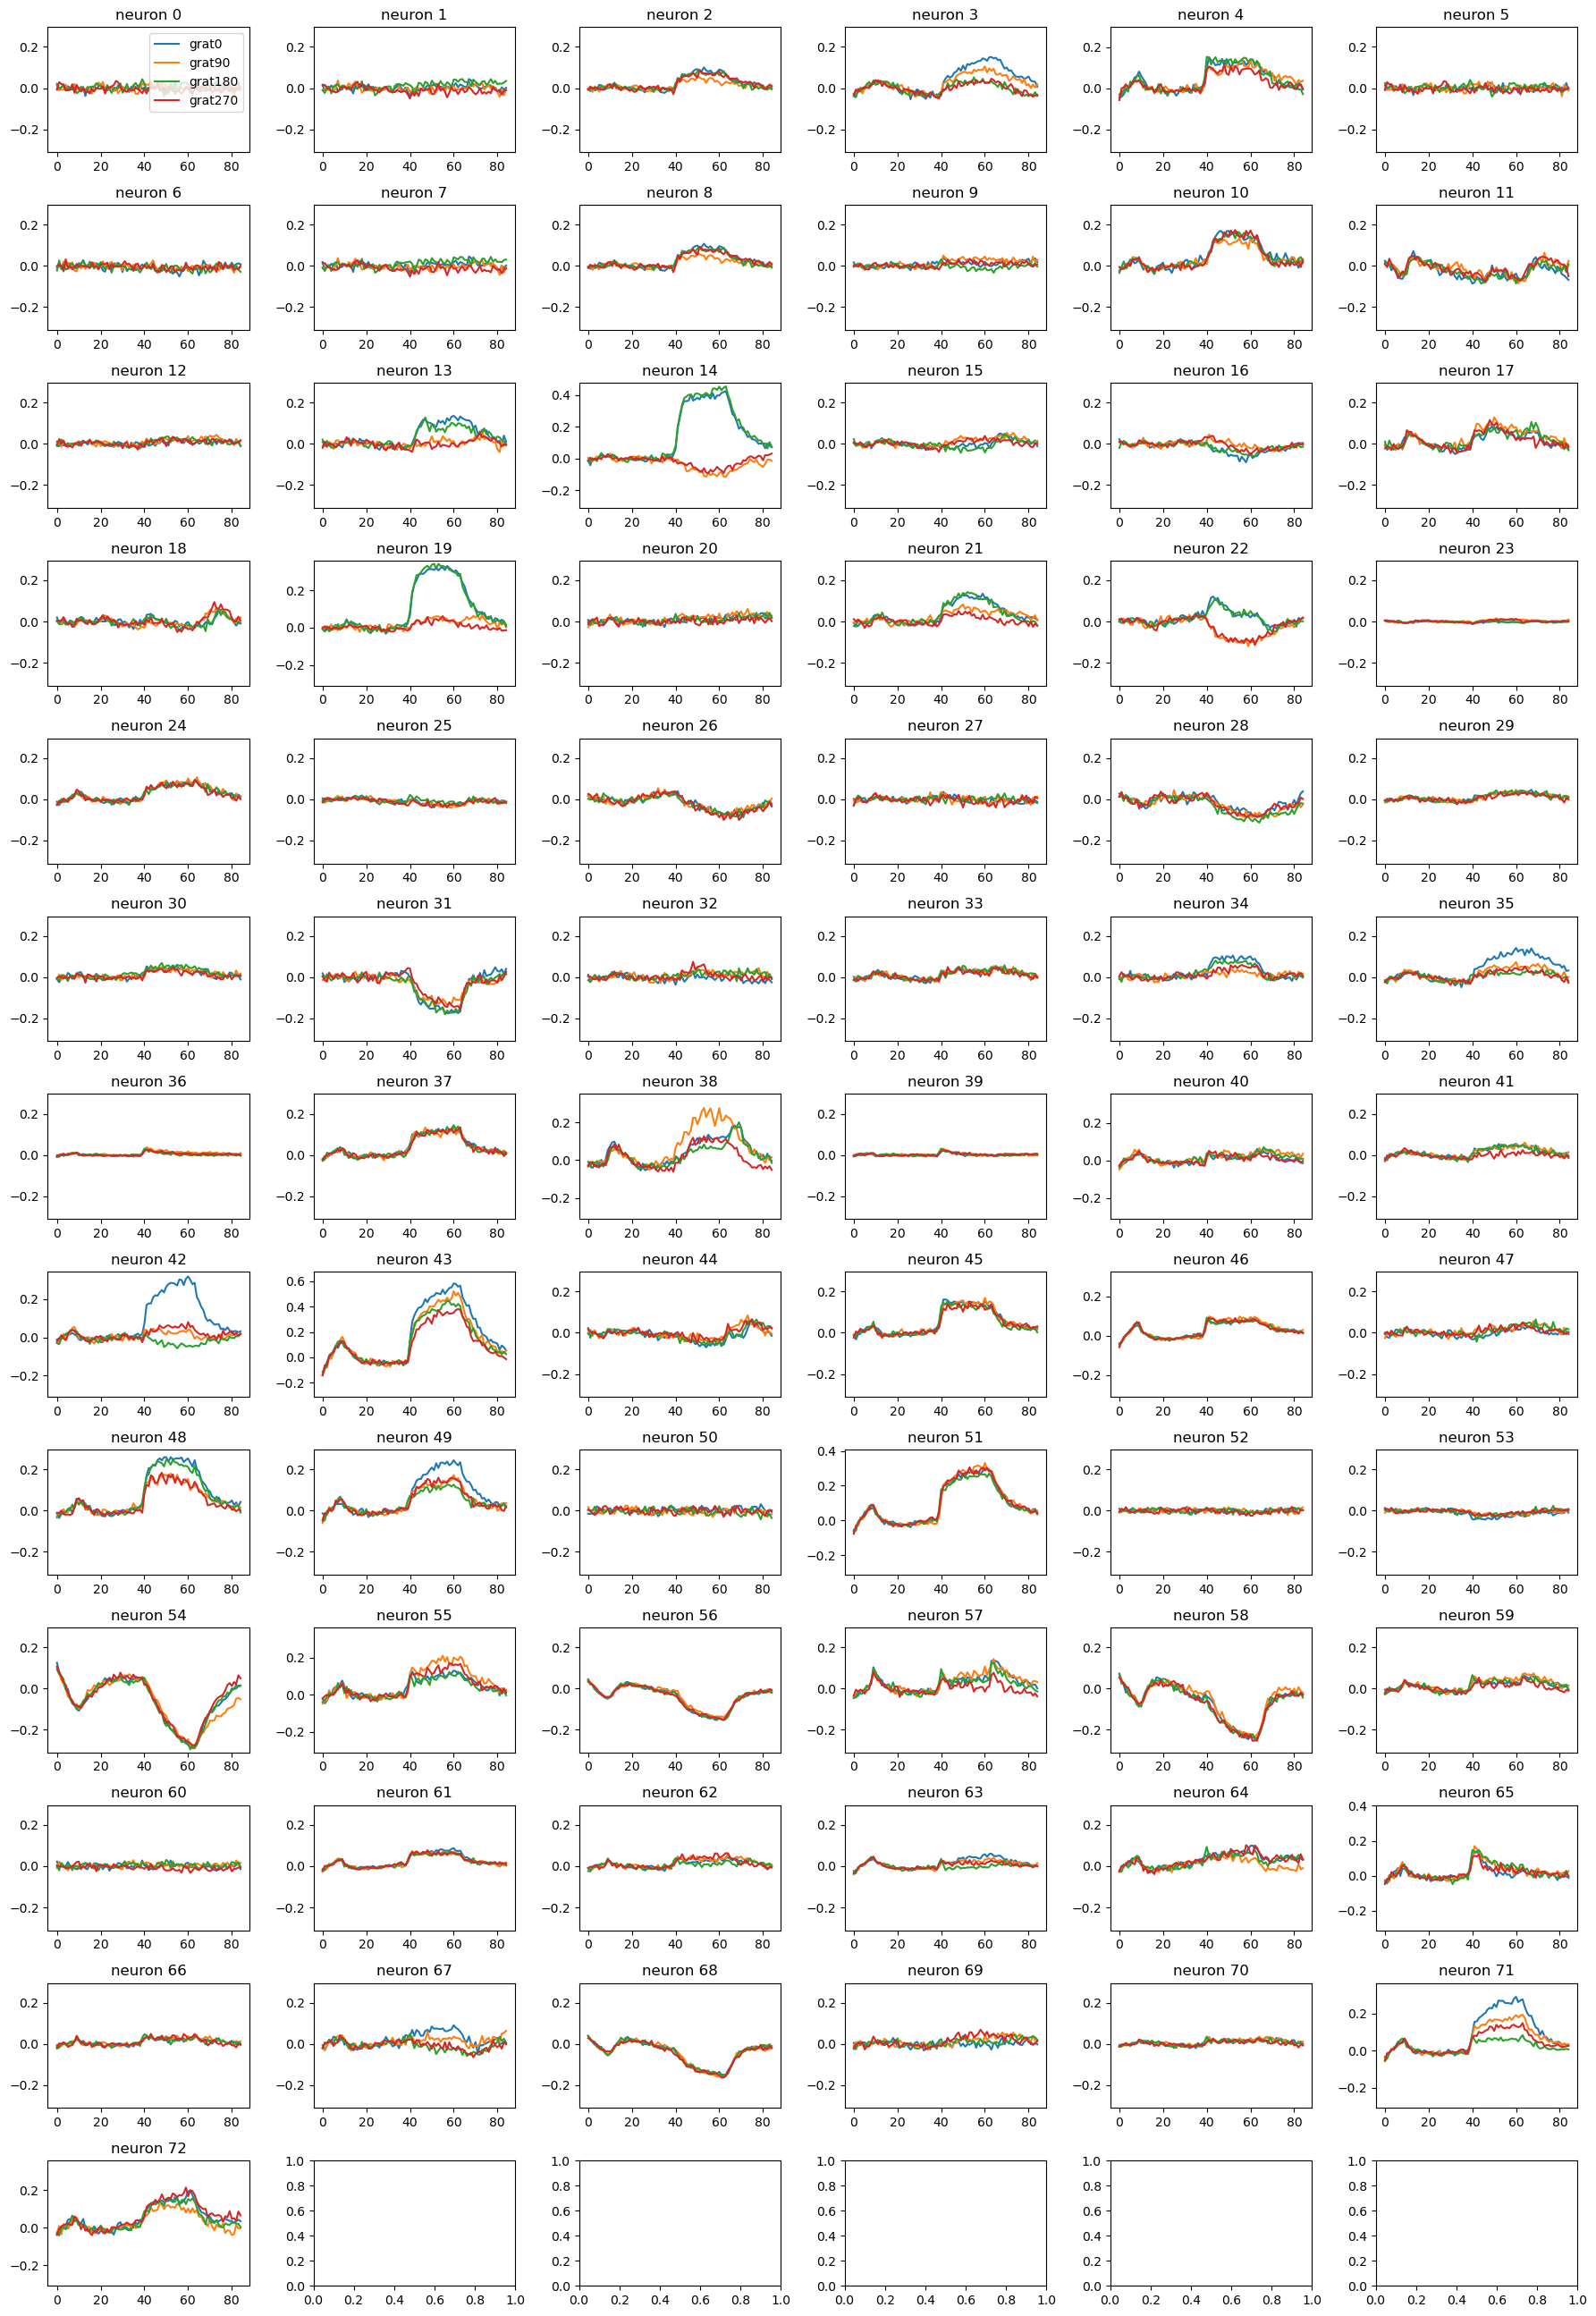

In [50]:
#pick a neuron
ni = 2



# pick some stimuli -- gratings all directions
stim_is = gratings_ixs
stim_lbls = ['grat0', 'grat90', 'grat180', 'grat270']
# f, axes = plt.subplots(1, len(stim_is), figsize=(4*len(stim_is), 3))
# for ax, si in zip(axes, stim_is):

ncols = 6
nrows = int(np.ceil(N_NEURONS/ncols))

vmin = X.min()
vmax = abs(vmin)

f, axes = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*2))
for ni in range(N_NEURONS):
    ax = axes.ravel()[ni]
    for i,si in enumerate(stim_is):
        ax.plot(X[ni, si], label=stim_lbls[i])
    ax.set(ylim=(vmin*1.05, max(vmax, X[ni].max()*1.05)), title=f'neuron {ni}')
    if ni == 0:
        ax.legend()
        
f.tight_layout()
plt.show()

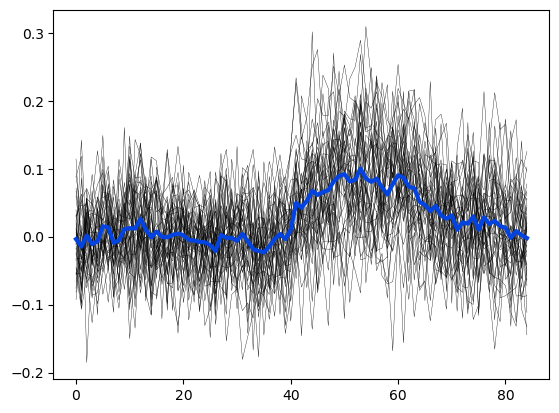

In [59]:
# plot one neuron, 1 stimulus, all trial time-courses on top of each other
# so we can have a feeling for the amount of variability

ni = 2
si = 19 # grating dir=0

all_trials_traces = np.concatenate([data[session_i,si][:,ni,:].T for session_i in range(N_SESSIONS)])
plt.plot(all_trials_traces.T, lw=.25, c='k');

plt.plot(all_trials_traces.mean(0), lw=3, c='xkcd:blue');

Text(0.5, 0, 'time (s)')

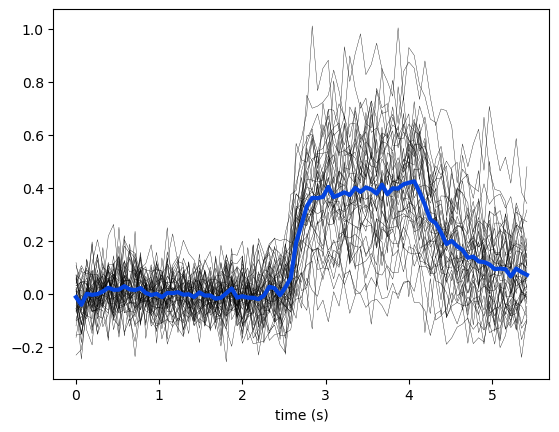

In [15]:
# plot one neuron, 1 stimulus, all trial time-courses on top of each other
# so we can have a feeling for the amount of variability

ni = 14
si = 19 # grating dir=0
ts = np.arange(all_trials_traces.shape[1])/15.5
all_trials_traces = np.concatenate([data[session_i,si][:,ni,:].T for session_i in range(N_SESSIONS)])
plt.plot(ts, all_trials_traces.T, lw=.25, c='k');

plt.plot(ts,all_trials_traces.mean(0), lw=3, c='xkcd:blue');
plt.xlabel('time (s)')

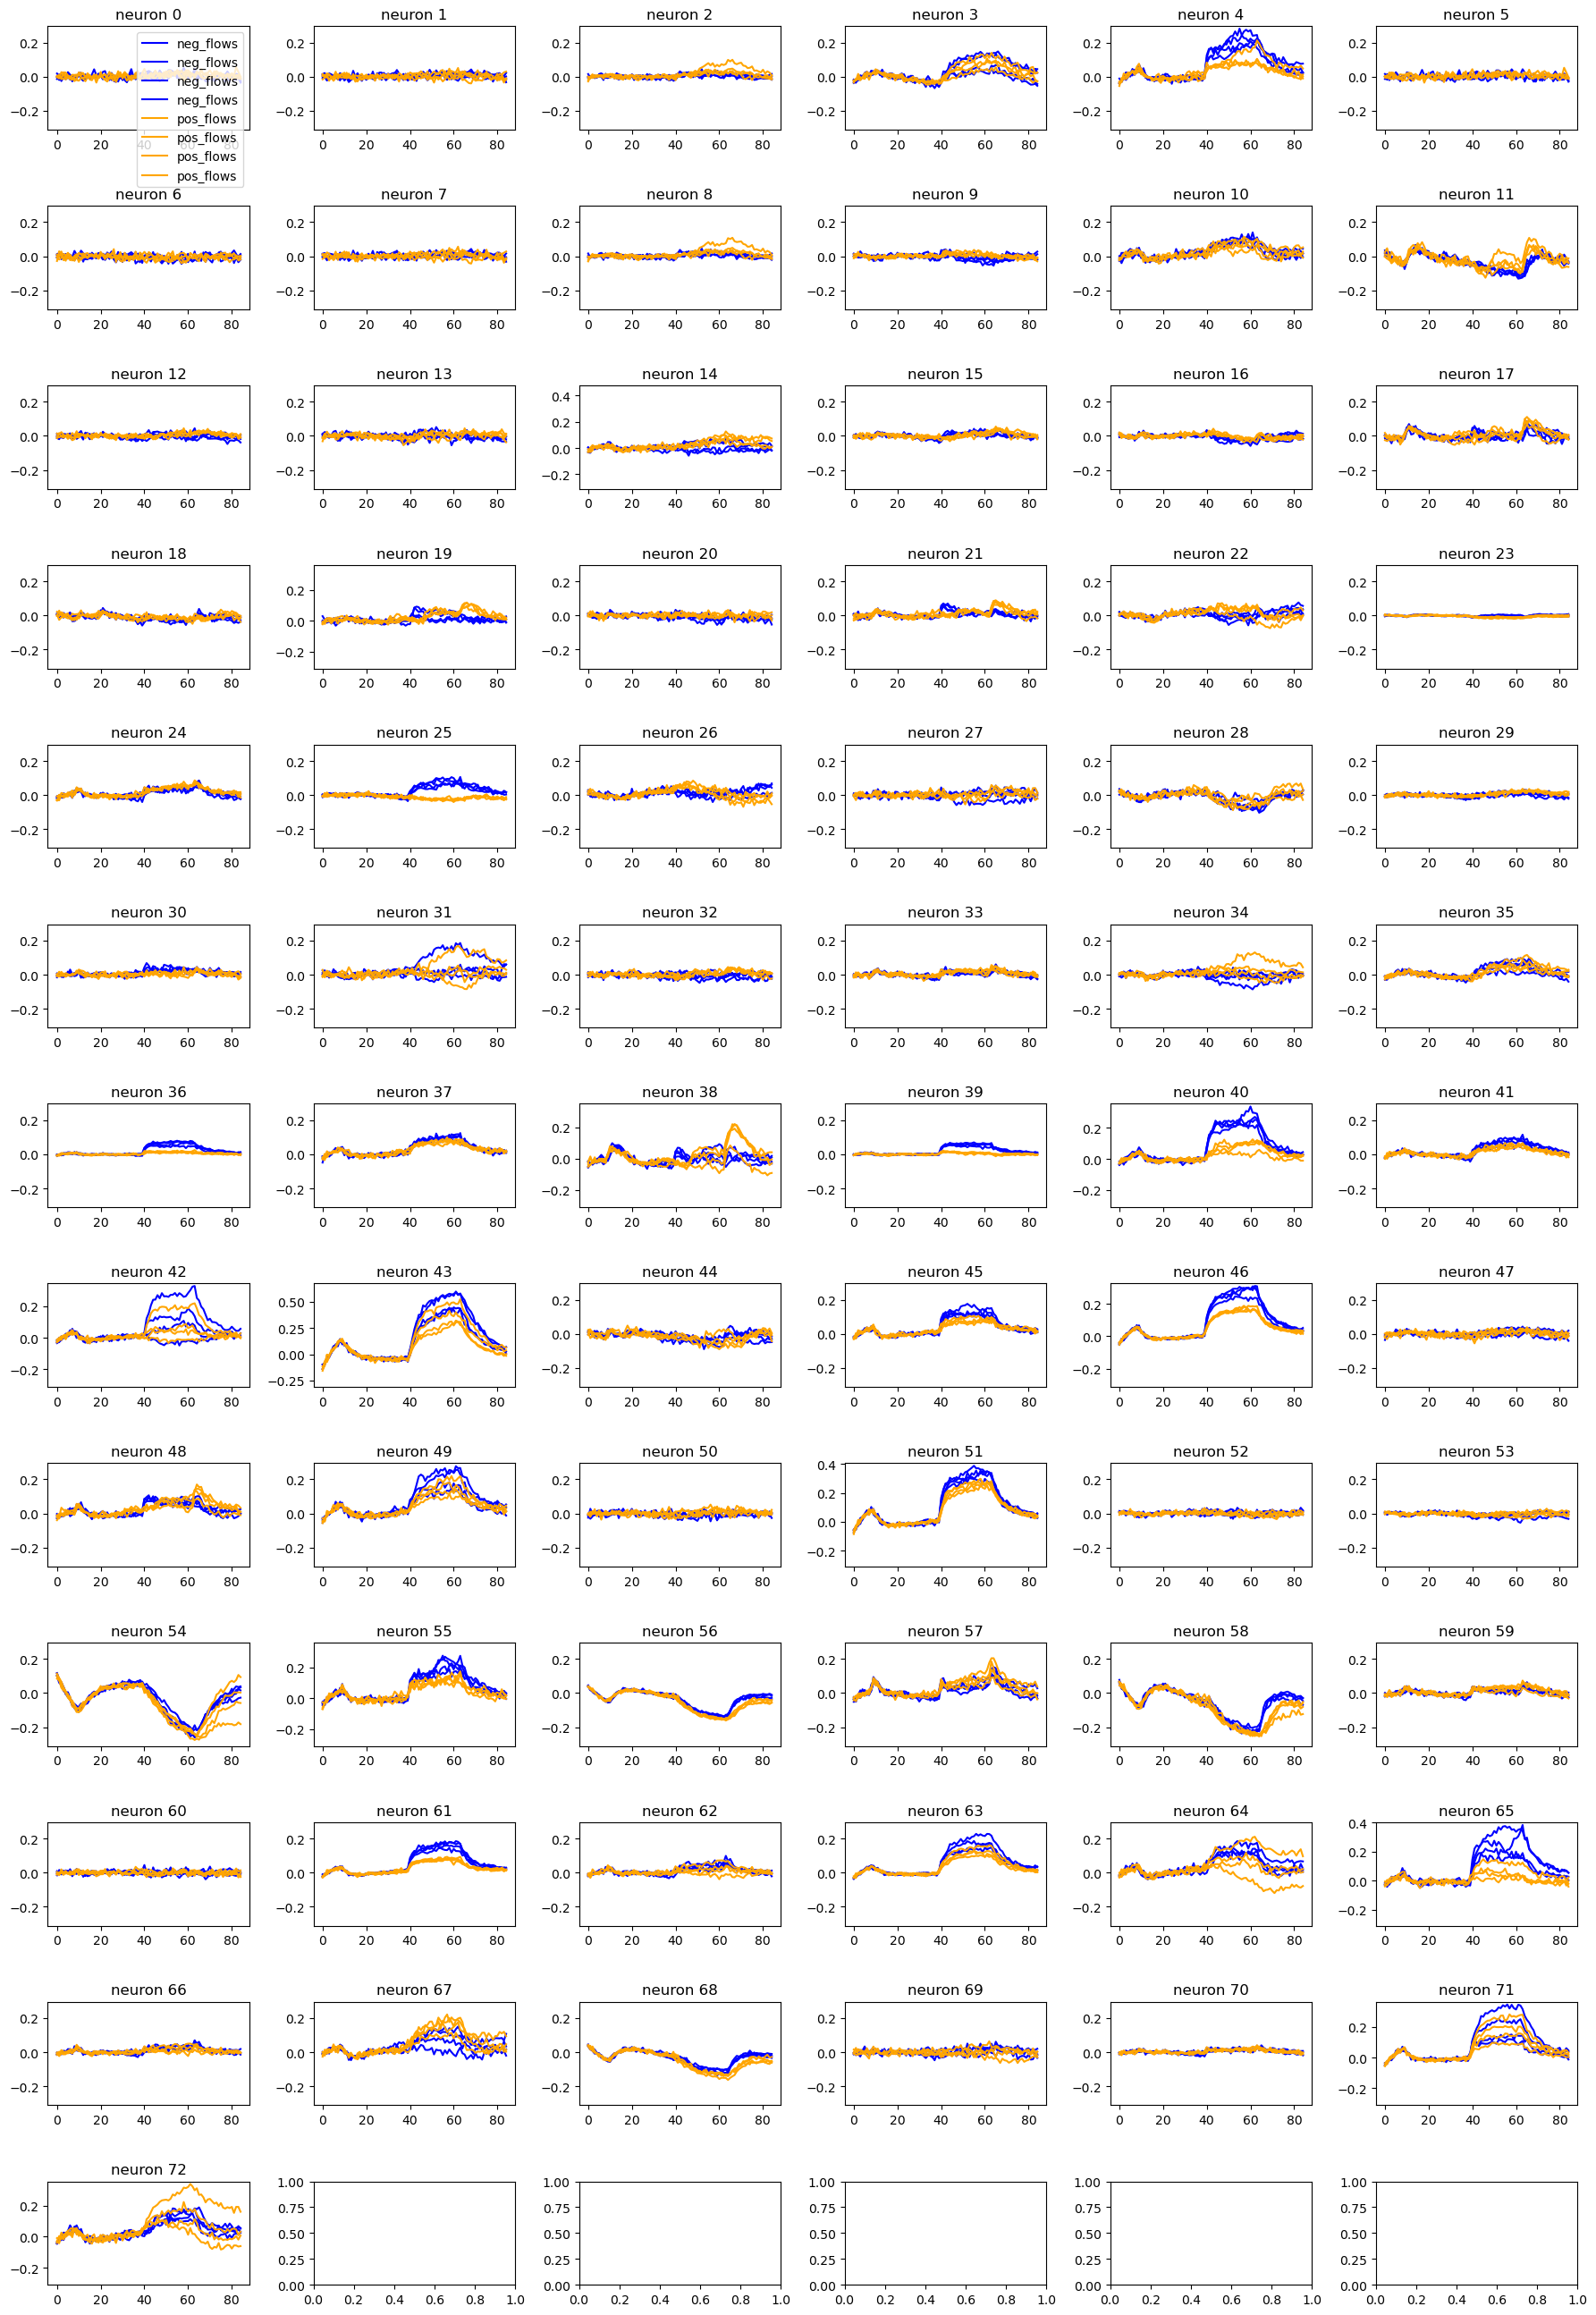

In [10]:
#pick a neuron
ni = 2



# pick some stimuli -- gratings all directions
stim_is = [[9, 22, 32, 0], [25, 28, 2, 10]]
stim_lbls = ['neg_flows','pos_flows']
colors = ['b','orange']
# f, axes = plt.subplots(1, len(stim_is), figsize=(4*len(stim_is), 3))
# for ax, si in zip(axes, stim_is):

ncols = 6
nrows = int(np.ceil(N_NEURONS/ncols))

vmin = X.min()
vmax = abs(vmin)

f, axes = plt.subplots(nrows,ncols,figsize=(ncols*3,nrows*2))
for ni in range(N_NEURONS):
    ax = axes.ravel()[ni]
    for i,sis in enumerate(stim_is):
        for si in sis:
            ax.plot(X[ni, si], color=colors[i], label=stim_lbls[i])
    ax.set(ylim=(vmin*1.05, max(vmax, X[ni].max()*1.05)), title=f'neuron {ni}')
    if ni == 0:
        ax.legend()
        
f.tight_layout()
plt.show()